In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer



In [41]:
import seaborn as sns
import matplotlib.pyplot as plt


In [26]:
scaller=MinMaxScaler(feature_range=(0,1))
enocder=LabelEncoder()


In [3]:
df=pd.read_csv("/home/amal/Datasets/train.csv",index_col=False).dropna()
data=df.drop('Name',axis=1)
data.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False


In [4]:
# find out the is there any missing values by using isnull()
missing_value_count=data.isnull().sum()
print(missing_value_count)


total_cells=np.product(data.shape)
total_missing=missing_value_count.sum()
percentage_missing=(total_missing/total_cells)*100
print('missing values is:',percentage_missing)

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64
missing values is: 0.0


In [5]:
# now lets scale the data values usingn MinMax scales
columns=data[['PassengerId','RoomService','Age','FoodCourt','ShoppingMall','VRDeck']]
scaled_columns=scaller.fit_transform(columns)
scaled_columns= pd.DataFrame(scaled_columns, columns = columns.columns)
print("before scaling\n", columns.max())
print("after scaling\n",scaled_columns.max())


before scaling
 PassengerId     9280_02
RoomService      9920.0
Age                79.0
FoodCourt       29813.0
ShoppingMall    12253.0
VRDeck          20336.0
dtype: object
after scaling
 PassengerId     1.0
RoomService     1.0
Age             1.0
FoodCourt       1.0
ShoppingMall    1.0
VRDeck          1.0
dtype: float64


In [6]:
print("before scaling the min values \n",columns.min())
print("after the scaling the min values:\n",scaled_columns.min())

before scaling the min values 
 PassengerId     0001_01
RoomService         0.0
Age                 0.0
FoodCourt           0.0
ShoppingMall        0.0
VRDeck              0.0
dtype: object
after the scaling the min values:
 PassengerId     0.0
RoomService     0.0
Age             0.0
FoodCourt       0.0
ShoppingMall    0.0
VRDeck          0.0
dtype: float64


In [7]:
# now lets see deal with the categorical text data
text_column_df=data[["HomePlanet","CryoSleep","Cabin","VIP","Transported"]]
text_column_df

,HomePlanet,CryoSleep,Cabin,VIP,Transported
0,Europa,False,B/0/P,False,False
1,Earth,False,F/0/S,False,True
2,Europa,False,A/0/S,True,False
3,Europa,False,A/0/S,False,False
4,Earth,False,F/1/S,False,True
...,...,...,...,...,...
8688,Europa,False,A/98/P,True,False
8689,Earth,True,G/1499/S,False,False
8690,Earth,False,G/1500/S,False,True
8691,Europa,False,E/608/S,False,False


In [8]:
text_column_df['HomePlanet'].value_counts()
# here we have 3 category of data
# so that we have to map this 3 text category to numeric value

Earth     3566
Europa    1673
Mars      1367
Name: HomePlanet, dtype: int64

In [9]:

text_column_df['HomePlanet']=text_column_df['HomePlanet'].map({'Earth':0,'Europa':1,'Mars':2})

/tmp/ipykernel_22234/4020400450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_column_df['HomePlanet']=text_column_df['HomePlanet'].map({'Earth':0,'Europa':1,'Mars':2})


In [10]:
text_column_df

,HomePlanet,CryoSleep,Cabin,VIP,Transported
0,1,False,B/0/P,False,False
1,0,False,F/0/S,False,True
2,1,False,A/0/S,True,False
3,1,False,A/0/S,False,False
4,0,False,F/1/S,False,True
...,...,...,...,...,...
8688,1,False,A/98/P,True,False
8689,0,True,G/1499/S,False,False
8690,0,False,G/1500/S,False,True
8691,1,False,E/608/S,False,False


In [11]:
# text_column_df["CryoSleep"].value_counts()
text_column_df["CryoSleep"]=enocder.fit_transform(text_column_df["CryoSleep"])

/tmp/ipykernel_22234/1766293913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_column_df["CryoSleep"]=enocder.fit_transform(text_column_df["CryoSleep"])


In [12]:
text_column_df["Cabin"].value_counts()
text_column_df["Cabin"]=enocder.fit_transform(text_column_df["Cabin"])

/tmp/ipykernel_22234/1804085514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_column_df["Cabin"]=enocder.fit_transform(text_column_df["Cabin"])


In [13]:
text_column_df["VIP"].value_counts()

False    6444
True      162
Name: VIP, dtype: int64

In [16]:
text_column_df["VIP"]=enocder.fit_transform(text_column_df["VIP"])

/tmp/ipykernel_22234/39321495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_column_df["VIP"]=enocder.fit_transform(text_column_df["VIP"])


In [17]:
text_column_df

,HomePlanet,CryoSleep,Cabin,VIP,Transported
0,1,0,137,0,False
1,0,0,1823,0,True
2,1,0,1,1,False
3,1,0,1,0,False
4,0,0,1825,0,True
...,...,...,...,...,...
8688,1,0,134,1,False
8689,0,1,4293,0,False
8690,0,0,4298,0,True
8691,1,0,1778,0,False


In [30]:
training_data=pd.concat([scaled_columns,text_column_df],axis=1,join='inner')

In [31]:
training_data

,PassengerId,RoomService,Age,FoodCourt,ShoppingMall,VRDeck,HomePlanet,CryoSleep,Cabin,VIP,Transported
0,0.000000,0.000000,0.493671,0.000000,0.000000,0.000000,1,0,137,0,False
1,0.000108,0.010988,0.303797,0.000302,0.002040,0.002164,0,0,1823,0,True
2,0.000216,0.004335,0.734177,0.119948,0.000000,0.002410,1,0,1,1,False
3,0.000217,0.000000,0.417722,0.043035,0.030278,0.009491,1,0,1,0,False
4,0.000323,0.030544,0.202532,0.002348,0.012324,0.000098,0,0,1825,0,True
...,...,...,...,...,...,...,...,...,...,...,...
6597,0.999137,0.024194,0.329114,0.008117,0.041622,0.000000,0,0,2319,0,False
6598,0.999138,0.008669,0.265823,0.000101,0.012160,0.016178,1,0,747,0,False
6599,0.999460,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,2320,0,False
6604,0.999999,0.000000,0.405063,0.035186,0.000000,0.159077,1,0,702,0,True


In [25]:
missing_value_count=training_data.isnull().sum()
print(missing_value_count)


total_cells=np.product(training_data.shape)
total_missing=missing_value_count.sum()
percentage_missing=(total_missing/total_cells)*100
print('missing values is:',percentage_missing)

PassengerId     0
RoomService     0
Age             0
FoodCourt       0
ShoppingMall    0
VRDeck          0
HomePlanet      0
CryoSleep       0
Cabin           0
VIP             0
Transported     0
dtype: int64
missing values is: 0.0


In [27]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 6605
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4999 non-null   float64
 1   RoomService   4999 non-null   float64
 2   Age           4999 non-null   float64
 3   FoodCourt     4999 non-null   float64
 4   ShoppingMall  4999 non-null   float64
 5   VRDeck        4999 non-null   float64
 6   HomePlanet    4999 non-null   int64  
 7   CryoSleep     4999 non-null   int64  
 8   Cabin         4999 non-null   int64  
 9   VIP           4999 non-null   int64  
 10  Transported   4999 non-null   bool   
dtypes: bool(1), float64(6), int64(4)
memory usage: 434.5 KB


<AxesSubplot:>

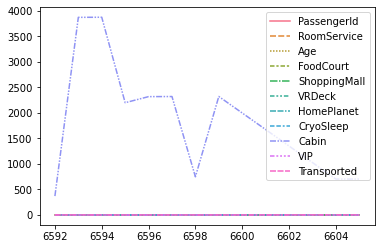

In [35]:
vis_data=training_data.tail(10)

sns.lineplot(data=vis_data)

In [40]:
plt.figure(figsize=(14,6))
# sns.lineplot(data=training_data['Age'])



    

SyntaxError: invalid syntax (38418432.py, line 4)

In [4]:
git init


SyntaxError: invalid syntax (3277417328.py, line 1)